# My First Convolutional Neural Network : MNIST
---
## 일단 Quick 하게

코드는 정말 수루룩 끝난다!

그래서 다시 한 번! 아래 그림을 보고 구조를 확실히 추적할 수 있어야 한다.

* [Ex1](https://cdn-images-1.medium.com/max/1600/1*O9ulXVmjBustHGLi1zRthA.png)
* [Ex2](https://cdn-images-1.medium.com/max/1600/1*jqKHgwZ8alM3K_JRYO_l4w.png)



### 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


id = 6420
다음 그림은 숫자 9 입니다.


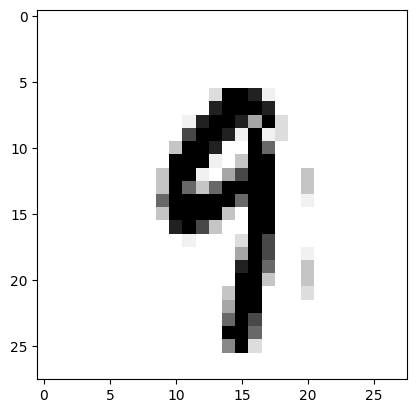

In [9]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0, 10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y[id]} 입니다.')
plt.imshow(test_x[id], cmap='Greys')
plt.show()

### Convolutional Layer를 사용하기 위한 reshape!

- **채널이 추가되어야 한다**

In [10]:
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

In [11]:
_, h, w = train_x.shape

print(h, w)

28 28


In [12]:
train_x = train_x.reshape(train_x.shape[0], h, w, 1)
test_x = test_x.reshape(test_x.shape[0], h, w, 1)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


* 이미지가 0 ~ 1 사이 값을 갖도록 스케일 조정!

In [13]:
print(f'max : {train_x.max()} , min : {train_x.min()}')

max : 255 , min : 0


In [15]:
max_num = train_x.max()

train_x = train_x/max_num
test_x = test_x/max_num

In [14]:
max_n, min_n = train_x.max(), train_x.min()

In [ ]:
train_x = (train_x)

In [16]:
print(f'max : {train_x.max()} , min : {train_x.min()}')

max : 1.0 , min : 0.0


## 모델링

- Sequential API, Functional API 중 택일
- CNN에 관한 것만 추가가 된다.
[여기](https://keras.io/layers/convolutional/)를 적극적으로 참고하자.

In [17]:
train_x.shape, train_y.shape

((60000, 28, 28, 1), (60000,))

In [18]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

In [19]:
## Sequential API
# 1번. 세션 클리어
keras.backend.clear_session()

# 2번. 모델 발판 생성
model = keras.models.Sequential()

# 3번. 레이어 조립
model.add( Input(shape=(28,28,1)) )

model.add( Conv2D(filters=64,              # Conv2D를 통해 제작하려는 Feature map의 수
                  kernel_size=(3,3),       # filter size
                  strides=(1,1),           # filter가 얼마나 촘촘히 훑을 것인가 (sliding window)
                  padding='same',          # filter가 훑기 전에 상하좌우로 픽셀을 덧붙임
                  activation='relu') )     # activation 주의!!!

model.add( MaxPool2D(pool_size=(2,2)) )    # pooling filter 사이즈

model.add( Flatten() )
model.add( Dense(10, activation='softmax') )

# 4번. 컴파일
model.compile(loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'],
              optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 10)                125450    
                                                                 
Total params: 126090 (492.54 KB)
Trainable params: 126090 (492.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [22]:
# 데이터를 넣어서 학습시키자!
hist = model.fit(train_x, train_y, validation_split=0.2, epochs=10000, verbose=1,
                 callbacks=[es])

Epoch 1/10000
1500/1500 [==============================] - 15s 3ms/step - loss: 0.2068 - accuracy: 0.9402 - val_loss: 0.0946 - val_accuracy: 0.9737
Epoch 2/10000
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0758 - accuracy: 0.9773 - val_loss: 0.0722 - val_accuracy: 0.9793
Epoch 3/10000
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0568 - accuracy: 0.9829 - val_loss: 0.0650 - val_accuracy: 0.9808
Epoch 4/10000
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.0677 - val_accuracy: 0.9800
Epoch 5/10000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0379 - accuracy: 0.9880 - val_loss: 0.0717 - val_accuracy: 0.9796
Epoch 6/10000
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0655 - val_accuracy: 0.9806
Epoch 7/10000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 

In [23]:
performance_test = model.evaluate(test_x, test_y, batch_size=100)

print(f'Test Loss : {performance_test[0]:.6f} |  Test Accuracy : {performance_test[1]*100:.2f}%')

100/100 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9811
Test Loss : 0.059165 |  Test Accuracy : 98.11%


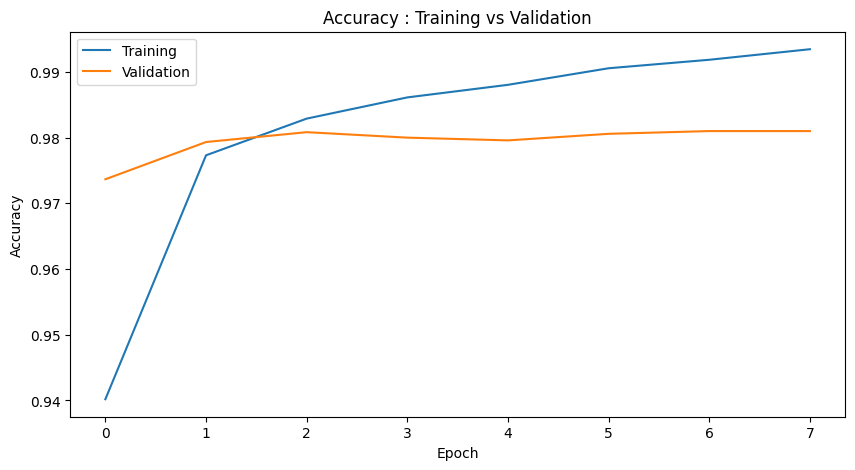

In [24]:
if not isinstance(hist, dict) :
    history = hist.history

plt.figure(figsize=(10, 5))
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

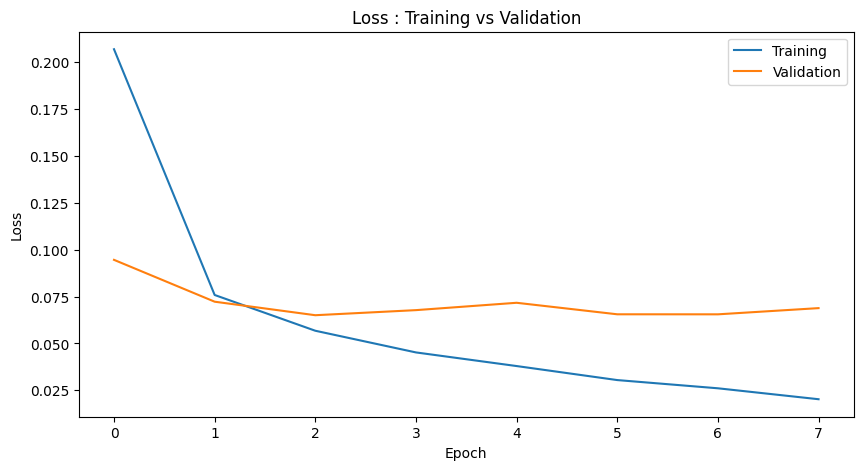

In [25]:
if not isinstance(hist, dict) :
    history = hist.history

plt.figure(figsize=(10, 5))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

* 예측값 생성

In [26]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%' )
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%' )

313/313 [==============================] - 1s 2ms/step
CNN
트레이닝 정확도 : 98.76%
테스트 정확도 : 98.11%


## 숫자 이미지 시각화

id = 9317
다음 그림은 숫자 6 입니다.
모델의 예측 : 6
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  0.  0. 99.  0.  0.  0.]
정답입니다


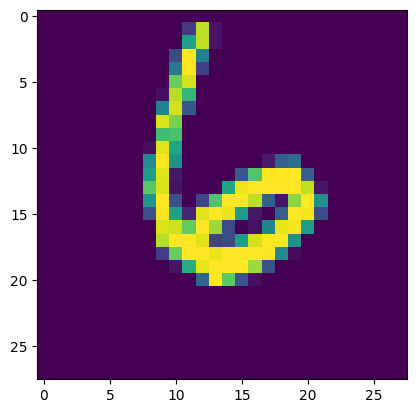

In [27]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

id = 2760
다음 그림은 숫자 9 입니다.
모델의 예측 : 4
모델의 카테고리별 확률 : [ 0.  1.  0.  0. 85.  0.  0.  0.  0. 12.]
틀렸어요


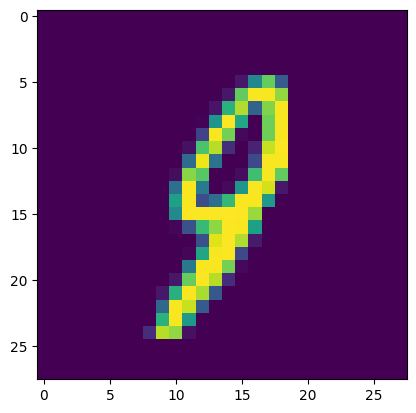

In [29]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y==single_pred_test)
f_id = np.where(true_false==False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]))
plt.show()